<a href="https://colab.research.google.com/github/josuelopes512/Rede-Neurais-Simples/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Funções Criadas Para a Implementação
#### - separação do dataset treino e teste
#### - criação da classe perceptron
#### - visualização dos dados das regioes

In [2]:
def train_test_split_x(X, target, test_size=0.2):
    # X =  2 colunas
    # target = 1 coluna

    # União X e target = 3 colunas
    conc = np.hstack((X, np.atleast_2d(target).T))

    train_size = 1 - test_size

    X = pd.DataFrame(X)
    target = pd.DataFrame(target)
    df = pd.DataFrame(conc)


    dicx = dict()
    labels = list(target[0].unique())
    for m in labels:
        dicx.update({m: df[df.iloc[:, -1]==m]})
    treino_test = {
        "treino": dict(),
        "teste": dict()
    }    
    for i in dicx.keys():
        treino_test["treino"][i] = dicx[i].sample(frac=train_size) 
        treino_test["teste"][i] = dicx[i].drop(treino_test["treino"][i].index)

    treino = pd.DataFrame()
    teste = pd.DataFrame()

    for i in treino_test.keys():
        if i == "treino":
            for j in treino_test[i].keys():
                treino = pd.concat([treino, treino_test[i][j]])
        if i == "teste":
            for j in treino_test[i].keys():
                teste = pd.concat([teste, treino_test[i][j]])

    treino = treino.sample(frac=1).reset_index(drop=True)
    teste = teste.sample(frac=1).reset_index(drop=True)

    return np.array(treino.iloc[:, :-1]), np.array(teste.iloc[:, :-1]), np.array(treino.iloc[:, -1]), np.array(teste.iloc[:, -1])


In [3]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            erros = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                erros += int(update != 0.0)
            self.errors_.append(erros)
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    def activation(self, X):
        return self.net_input(X)

In [4]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange (x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

In [6]:
def str_to_numb(y_train):
    k = []
    for i in y_train:
        if i == 'Iris-virginica':
            k.append(0)
        if i == 'Iris-versicolor':
            k.append(1)
        if i == 'Iris-setosa':
            k.append(2)
            
    return np.array(k)

# Leitura do Dataset

In [5]:
df = pd.read_csv('iris.data', names=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species'])
df.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Matriz de Confusão Geral dos dados

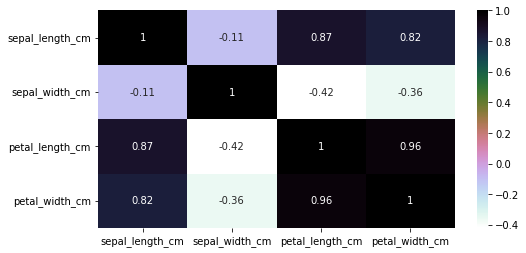

In [7]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

### Iris-setosa

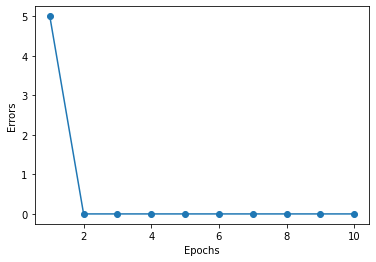

In [8]:
x = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

x_train, x_test, y_train, y_test = train_test_split_x(x, y, test_size=0.2)
classifier = Perceptron(eta=0.01, n_iter=10)
classifier.fit(x_train, y_train)
plt.plot(range(1, len(classifier.errors_) + 1), classifier.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


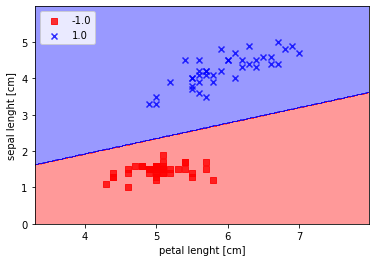

In [9]:
plot_decision_regions(x_train, y_train, classifier=classifier)
plt.xlabel('petal lenght [cm]')
plt.ylabel('sepal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

### Iris-versicolor

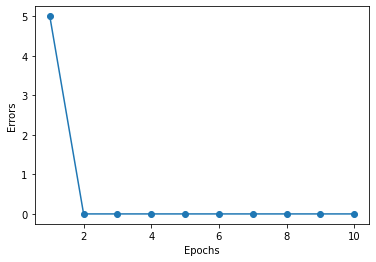

In [10]:
x = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

x_train, x_test, y_train, y_test = train_test_split_x(x, y, test_size=0.2)
classifier = Perceptron(eta=0.01, n_iter=10)
classifier.fit(x_train, y_train)
plt.plot(range(1, len(classifier.errors_) + 1), classifier.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


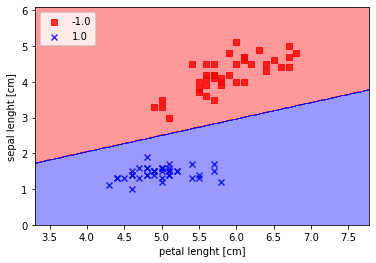

In [11]:
plot_decision_regions(x_train, y_train, classifier=classifier)
plt.xlabel('petal lenght [cm]')
plt.ylabel('sepal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

### Iris-virginica

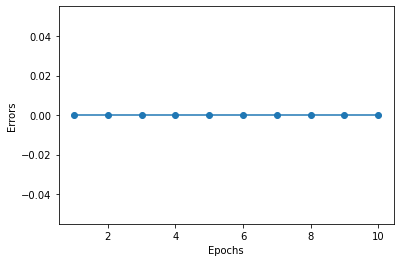

In [32]:
x = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-virginica', -1, 1)

x_train, x_test, y_train, y_test = train_test_split_x(x, y, test_size=0.2)
classifier = Perceptron(eta=0.01, n_iter=10)
classifier.fit(x,y)
plt.plot(range(1, len(classifier.errors_) + 1), classifier.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


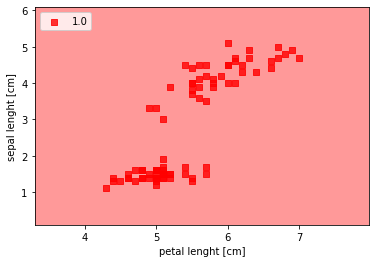

In [13]:
plot_decision_regions(x_train, y_train, classifier=classifier)
plt.xlabel('petal lenght [cm]')
plt.ylabel('sepal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

### Média dos dados

In [15]:
print(np.mean(df))

sepal_length_cm    5.843333
sepal_width_cm     3.054000
petal_length_cm    3.758667
petal_width_cm     1.198667
dtype: float64


c:\Users\Computador-PC\Desktop\perceptron\Rede-Neurais-Simples\venv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [16]:
try:
    print(np.mean(x_train))
    print(np.mean(x_test))
    print(np.mean(y_train))
    print(np.mean(y_test))
except:
    pass

4.154375
4.215
1.0
1.0


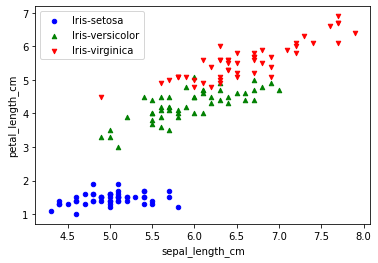

In [17]:
plot_area = None
colors = ['blue', 'green', 'red']
markers = ['o', '^', 'v']
labels = np.array(list(df['species'].unique()))
for var in labels:

  plot_area = df[df['species'] == var].plot.scatter(x='sepal_length_cm', y="petal_length_cm",
                                        ax=plot_area, color=colors.pop(0),
                                        marker=markers.pop(0), label=var)


c:\Users\Computador-PC\Desktop\perceptron\Rede-Neurais-Simples\venv\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


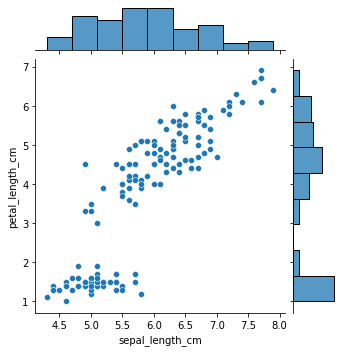

In [18]:
sns.jointplot(x='sepal_length_cm', y="petal_length_cm", data=df, size=5)

<AxesSubplot:xlabel='sepal_length_cm', ylabel='petal_length_cm'>

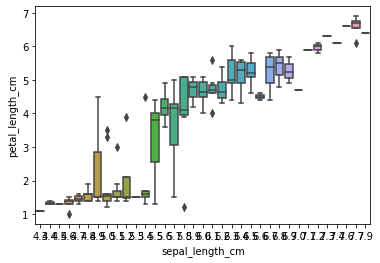

In [19]:
sns.boxplot(x='sepal_length_cm', y="petal_length_cm", data=df)

<AxesSubplot:xlabel='sepal_length_cm', ylabel='petal_length_cm'>

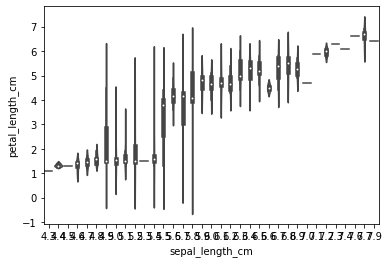

In [20]:
sns.violinplot(x='sepal_length_cm', y="petal_length_cm", data=df, size=6)   

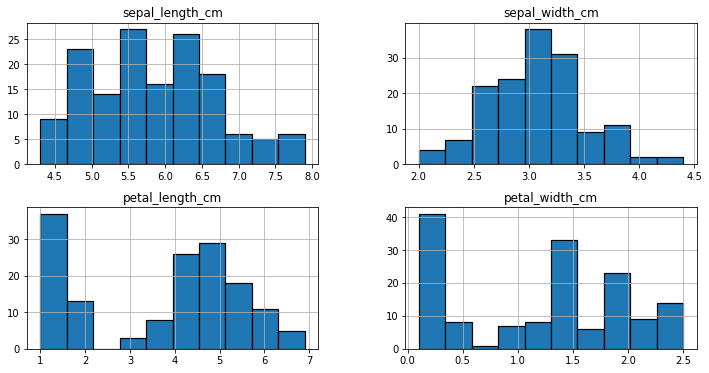

In [21]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

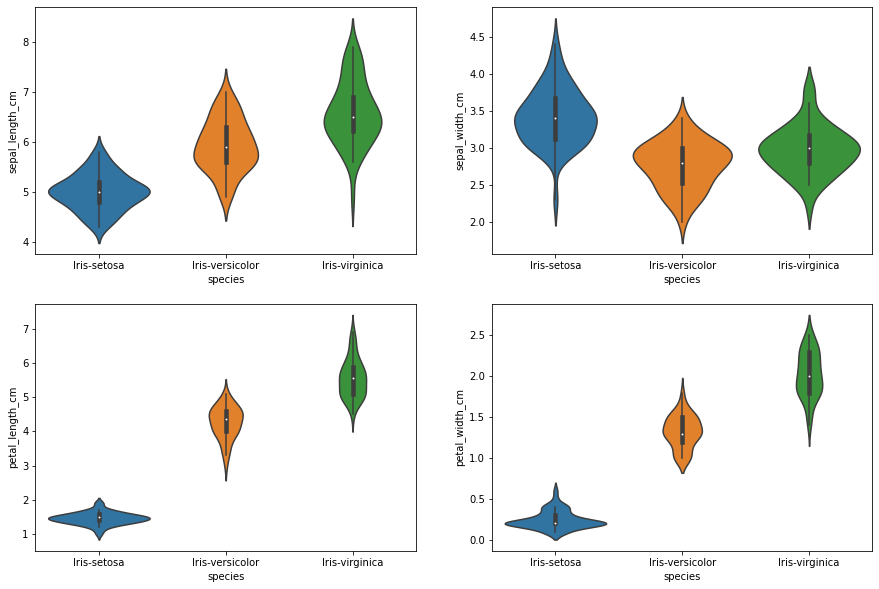

In [22]:
plt.figure(figsize=(15,10))

i = 0
titles = list(df.iloc[:, :-1])

while i < len(titles):
    plt.subplot(2,2,i+1)
    sns.violinplot(x='species', y=titles[i], data=df)
    i += 1


In [23]:
k = pd.DataFrame(x_train,  columns=['sepal_length_cm', 'petal_length_cm'])
k

,sepal_length_cm,petal_length_cm
0,5.7,1.5
1,4.3,1.1
2,6.0,5.1
3,6.3,4.9
4,4.5,1.3
...,...,...
75,6.0,4.5
76,5.1,1.6
77,6.0,4.5
78,5.6,4.5


In [24]:
kt = pd.DataFrame(x_test,  columns=['sepal_length_cm', 'petal_length_cm'])
kt

,sepal_length_cm,petal_length_cm
0,5.4,1.3
1,5.4,1.7
2,5.7,4.2
3,4.8,1.9
4,6.1,4.7
5,5.0,3.5
6,4.9,1.5
7,6.7,4.4
8,6.3,4.4
9,6.4,4.5


##  Standard Deviation - calculo

In [33]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()
print(x_std)

[[-0.5810659  -1.01435952]
 [-0.89430898 -1.01435952]
 [-1.20755205 -1.08374115]
 [-1.36417359 -0.94497788]
 [-0.73768744 -1.01435952]
 [-0.11120129 -0.80621461]
 [-1.36417359 -1.01435952]
 [-0.73768744 -0.94497788]
 [-1.67741667 -1.01435952]
 [-0.89430898 -0.94497788]
 [-0.11120129 -0.94497788]
 [-1.05093052 -0.87559625]
 [-1.05093052 -1.01435952]
 [-1.8340382  -1.22250442]
 [ 0.51528486 -1.15312279]
 [ 0.35866332 -0.94497788]
 [-0.11120129 -1.08374115]
 [-0.5810659  -1.01435952]
 [ 0.35866332 -0.80621461]
 [-0.5810659  -0.94497788]
 [-0.11120129 -0.80621461]
 [-0.5810659  -0.94497788]
 [-1.36417359 -1.29188606]
 [-0.5810659  -0.80621461]
 [-1.05093052 -0.66745134]
 [-0.73768744 -0.87559625]
 [-0.73768744 -0.87559625]
 [-0.42444437 -0.94497788]
 [-0.42444437 -1.01435952]
 [-1.20755205 -0.87559625]
 [-1.05093052 -0.87559625]
 [-0.11120129 -0.94497788]
 [-0.42444437 -0.94497788]
 [ 0.04542025 -1.01435952]
 [-0.89430898 -0.94497788]
 [-0.73768744 -1.15312279]
 [ 0.04542025 -1.08374115]
 